In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import arff as arf
import seaborn as sns

In [4]:
file=open("final-dataset.arff")
decoder=arf.ArffDecoder()
data=decoder.decode(file,encode_nominal=True)

In [5]:
vals=[val[0:-1] for val in data['data']]
labels=[lab[-1] for lab in data['data']]

In [6]:
da=set(labels)
brac=600
templ=[]
tempd=[]
for i in da:
    coun=0
    while coun<brac:
        for j in range(len(labels)):
            if labels[j]==i:
                templ.append(labels[j])
                tempd.append(vals[j])
                coun+=1
            if coun==brac:
                break
vals=tempd
labels=templ

In [7]:
l=len(vals)
print(da)
print(l)

{0, 1, 2, 3, 4}
3000


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
    vals, labels, stratify=labels, test_size=0.2, random_state=0
)

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)
y_train=np.array(Y_train)
y_test=np.array(Y_test)

In [10]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [11]:
model=SVC(kernel='sigmoid',gamma='auto')
model.fit(x_train,y_train)

SVC(gamma='auto', kernel='sigmoid')

In [12]:
y_pred=model.predict(x_test)

77.83333333333333 %


Text(0.5, 0.98, 'Confusion Matrix SVM')

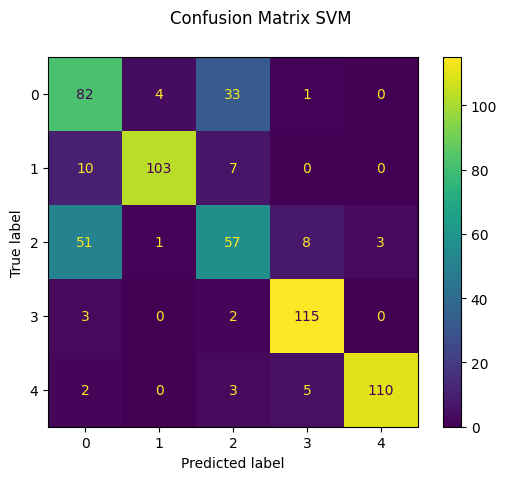

In [81]:

print((accuracy_score(y_pred,y_test))*100,"%")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix SVM")

In [14]:
model1=KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred1=model1.predict(x_test)

78.16666666666666 %


Text(0.5, 0.98, 'Confusion Matrix KNN')

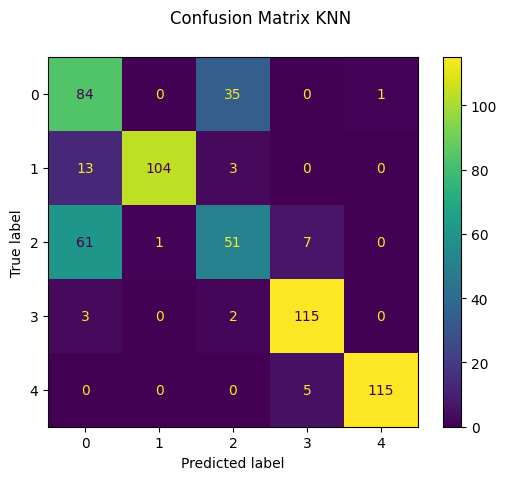

In [79]:
print((accuracy_score(y_pred1,y_test))*100,"%")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
disp.figure_.suptitle("Confusion Matrix KNN")

In [17]:
model2=GaussianNB()
model2.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred2=model2.predict(x_test)

81.5 %


Text(0.5, 0.98, 'Confusion Matrix NB')

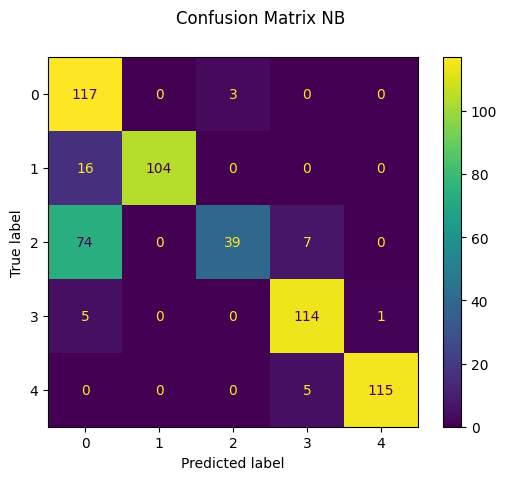

In [80]:
print((accuracy_score(y_pred2,y_test))*100,"%")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
disp.figure_.suptitle("Confusion Matrix NB")

In [20]:
train_x,val_x,train_y,val_y=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2,random_state=0)

In [21]:
print(x_train.shape,x_test.shape)

(2400, 27) (600, 27)


In [22]:
columns=['SRC_ADD','DES_ADD','PKT_ID','FROM_NODE','TO_NODE','PKT_TYPE','PKT_SIZE',
         'FLAGS','FID','SEQ_NUMBER','NUMBER_OF_PKT','NUMBER_OF_BYTE','NODE_NAME_FROM',
         'NODE_NAME_TO','PKT_IN','PKT_OUT','PKT_R','PKT_DELAY_NODE','PKT_RATE','BYTE_RATE',
         'PKT_AVG_SIZE','ULTILIZATION','PKT_DELAY','PKT_SEND_TIME','PKT_RESERVED_TIME',
         'FIRST_PKT_SENT','LAST_PKT_RESERVED']

In [23]:
model1=SVC(kernel='sigmoid',gamma='auto')
model1.fit(train_x,train_y)
y_val_pred1=model1.predict(val_x)
y_val_pred1=pd.DataFrame(y_val_pred1)
#y_test_pred1=model1.predict(x_test)
#y_test_pred1=pd.DataFrame(y_test_pred1)

In [24]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(train_x,train_y)
y_val_pred2=model2.predict(val_x)
y_val_pred2=pd.DataFrame(y_val_pred2)
#y_test_pred2=model2.predict(x_test)
#y_test_pred2=pd.DataFrame(y_test_pred2)

In [25]:
model3=GaussianNB()
model3.fit(train_x,train_y)
y_val_pred3=model3.predict(val_x)
y_val_pred3=pd.DataFrame(y_val_pred3)
#y_test_pred3=model3.predict(x_test)
#y_test_pred3=pd.DataFrame(y_test_pred3)

In [74]:
y_test=pd.DataFrame(y_test)
val_input=pd.concat([pd.DataFrame(val_x,columns=columns),
                     y_val_pred1,y_val_pred2,y_val_pred3],axis=1)
test_input=pd.concat([pd.DataFrame(x_test,columns=columns),
                      y_test,y_test,y_test],axis=1)

In [75]:
val_input.columns = val_input.columns.astype(str)
model=RandomForestClassifier(n_estimators=200)
model.fit(val_input,val_y)

RandomForestClassifier(n_estimators=200)

82.0 %


Text(0.5, 0.98, 'Confusion Matrix Hybrid')

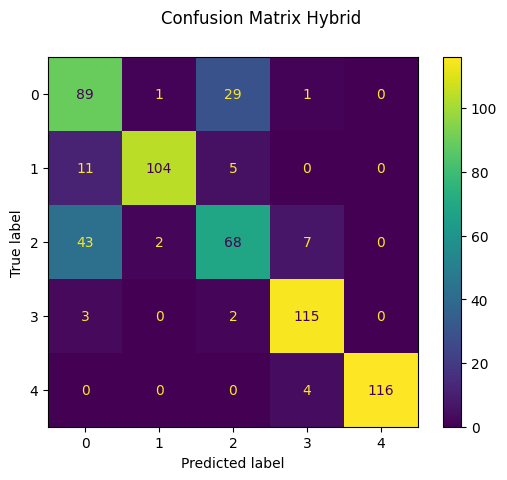

In [82]:
test_input.columns = test_input.columns.astype(str)

print((accuracy_score(model.predict(test_input),y_test))*100,"%")
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, model.predict(test_input))
disp.figure_.suptitle("Confusion Matrix Hybrid")